# Imports library

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


#  Import data 

In [3]:
path = 'CocaCola_Sales_Rawdata.xlsx'

df = pd.read_excel(path)

df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


# Visualize the Time Series

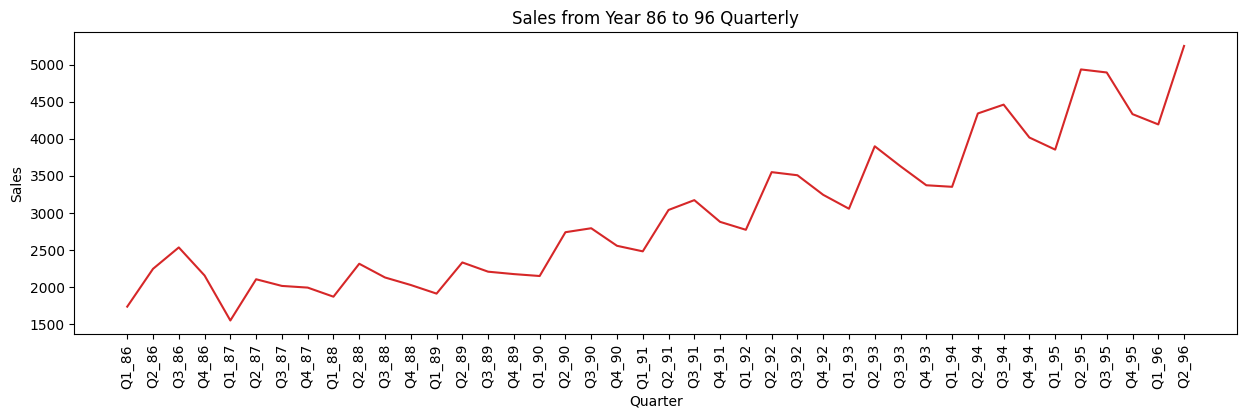

In [5]:
def plot_df(df, x, y, title="", xlabel='Quarter', ylabel='Sales', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.xticks(rotation=90)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Quarter'], y=df['Sales'], title='Sales from Year 86 to 96 Quarterly')

# Patterns in a Time Series

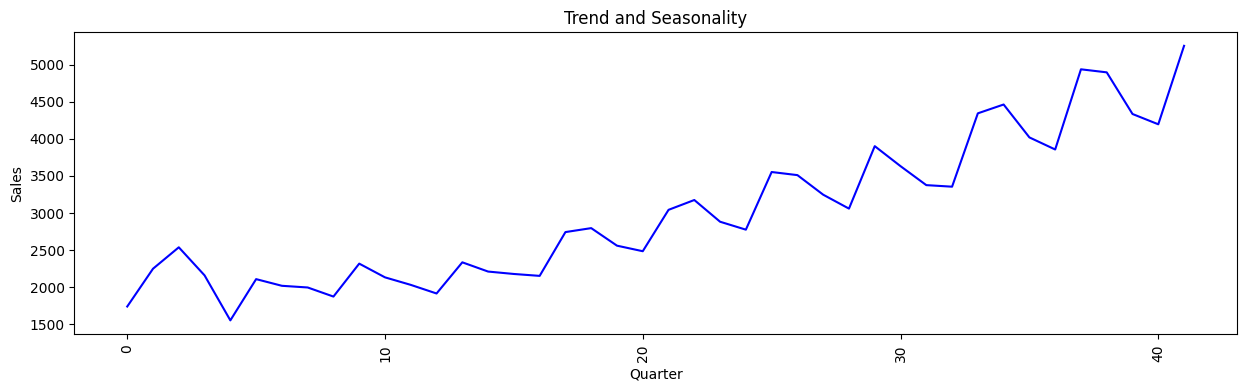

In [6]:
def plot_df(df, x, y, title="", xlabel='Quarter', ylabel='Sales', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.xticks(rotation=90)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df.index, y=df['Sales'], title='Trend and Seasonality')

# Additive and Multiplicative Time Series 

Additive time series:

Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:

Value = Base Level x Trend x Seasonality x Error

# Decomposition of a Time Series

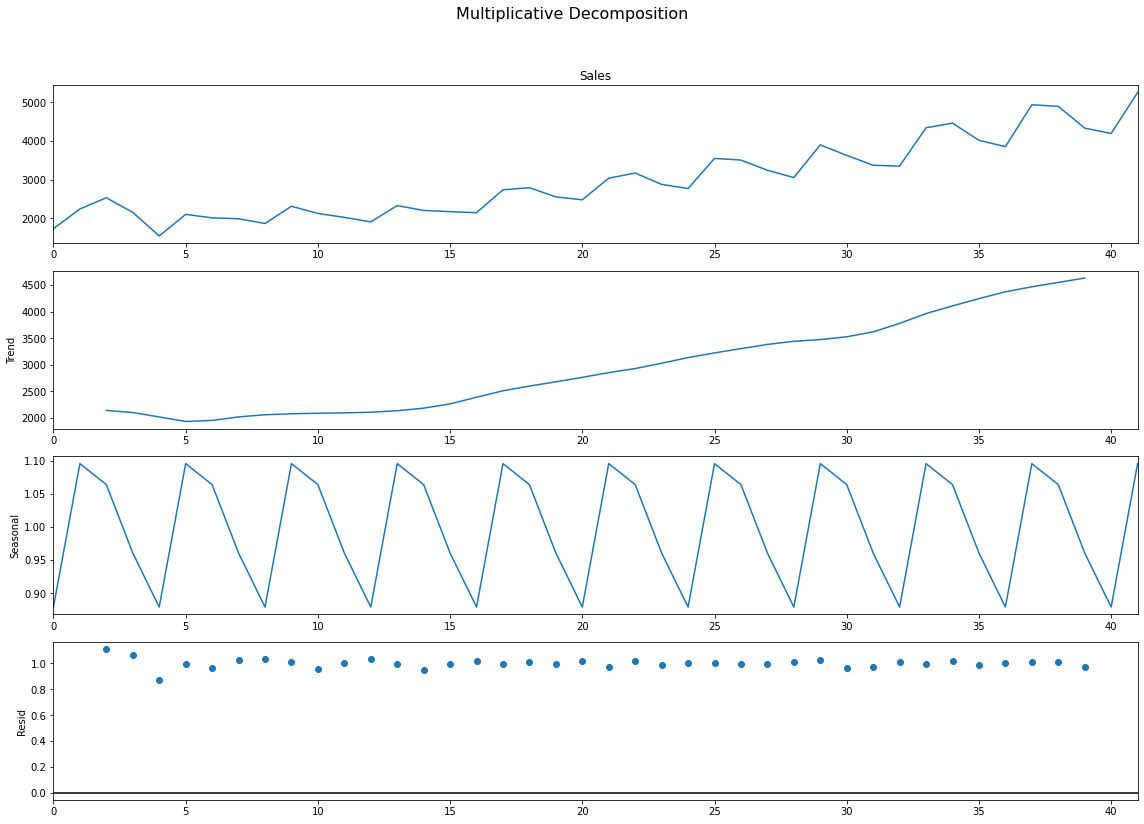

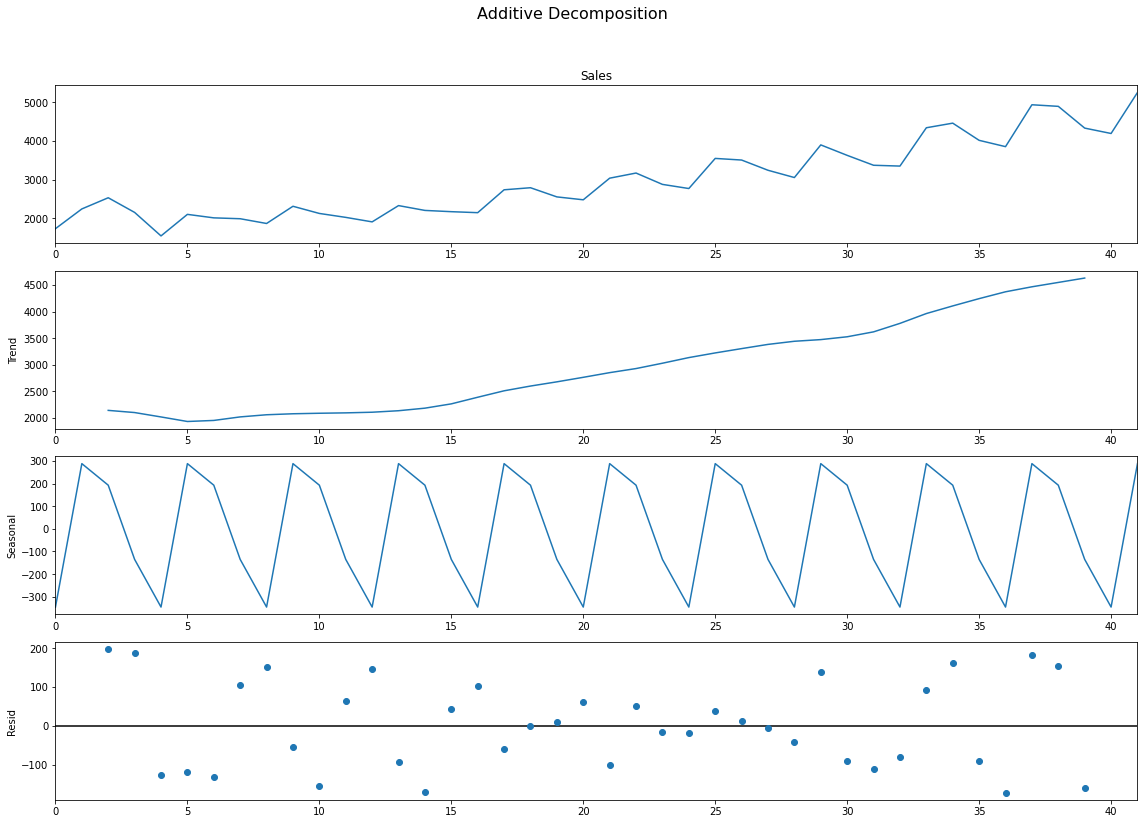

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Sales'], model='multiplicative', period=4)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Sales'], model='additive', period=4)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

# Stationary and Non-Stationary Time Series 

Stationary and Non-Stationary Time Series. Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time. So, the values are independent of time.

Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values.

We can covert any non-stationary time series into a stationary one by applying a suitable transformation. Mostly statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

# How to make a time series stationary?

We can apply some sort of transformation to make the time-series stationary.
These transformation may include:
* Differencing the Series (once or more)
* Take the log of the series
* Take the nth root of the series
* Combination of the above

The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

# Detrend a Time Series 

Detrending a time series means to remove the trend component from the time series. 

Text(0.5, 1.0, 'Sales detrended by subtracting the least squares fit')

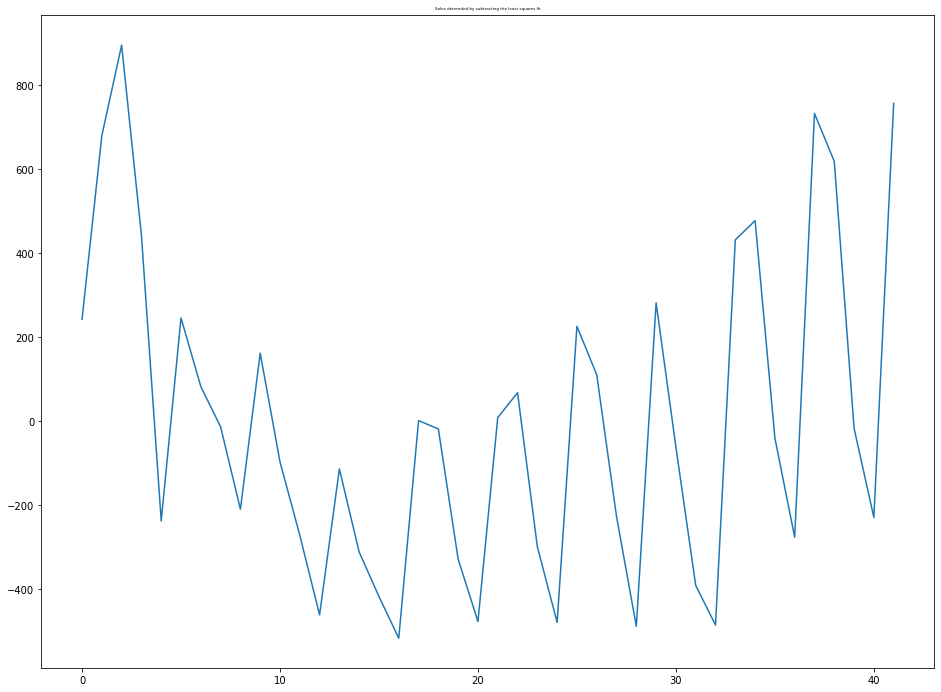

In [8]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Sales'].values)
plt.plot(detrended)
plt.title('Sales detrended by subtracting the least squares fit', fontsize=4)

Text(0.5, 1.0, 'Sales detrended by subtracting the trend component')

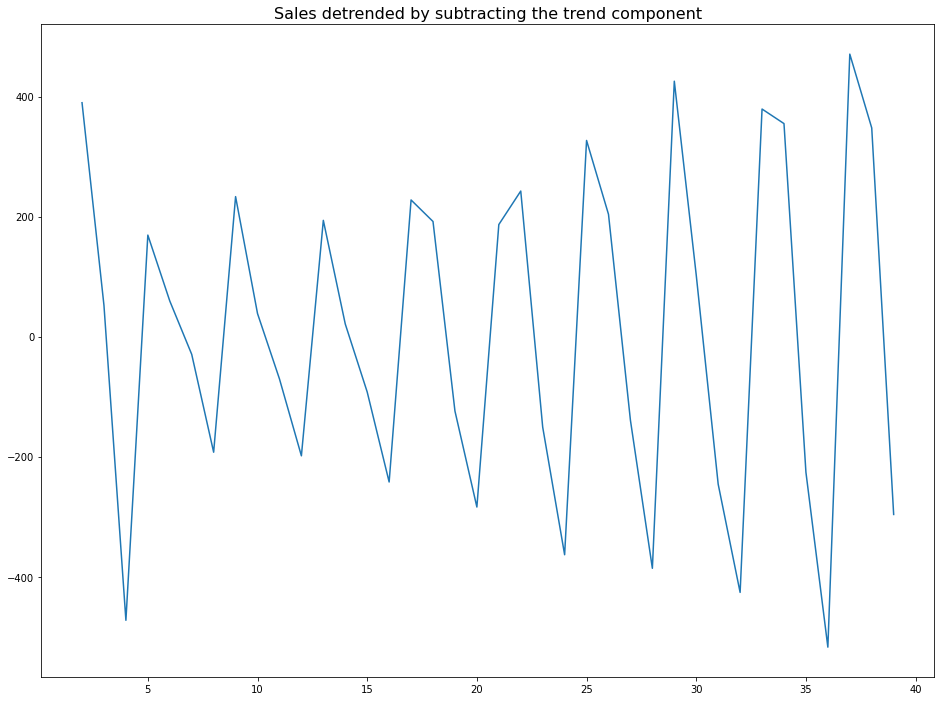

In [9]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Sales'], model='multiplicative', period=4)
detrended = df['Sales'].values - result_mul.trend
plt.plot(detrended)
plt.title('Sales detrended by subtracting the trend component', fontsize=16)

# Deseasonalize a Time Series 

There are multiple approaches to deseasonalize a time series. These approaches are listed below:

* Take a moving average with length as the seasonal window. This will smoothen in series in the process.
* Seasonal difference the series (subtract the value of previous season from the current value).
* Divide the series by the seasonal index obtained from STL decomposition.
* If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

[]

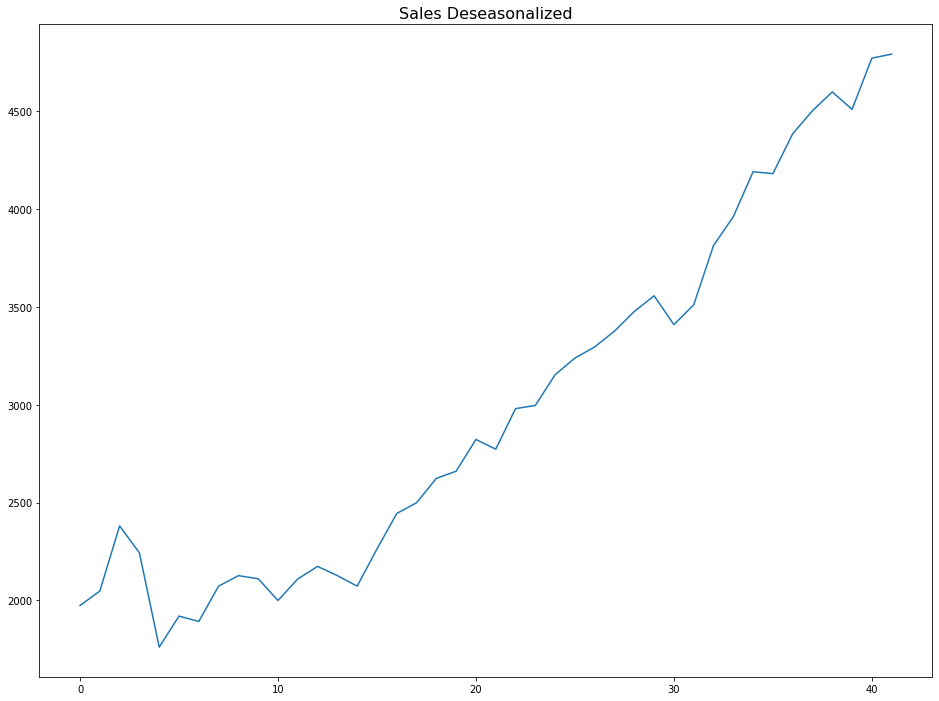

In [10]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Sales'], model='multiplicative', period=4)


# Deseasonalize
deseasonalized = df['Sales'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Sales Deseasonalized', fontsize=16)
plt.plot()

# How to test for seasonality of a time series? 

The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.

* Hour of day
* Day of month
* Weekly
* Monthly
* Yearly
* Quarterly

However, if we want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. 

There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

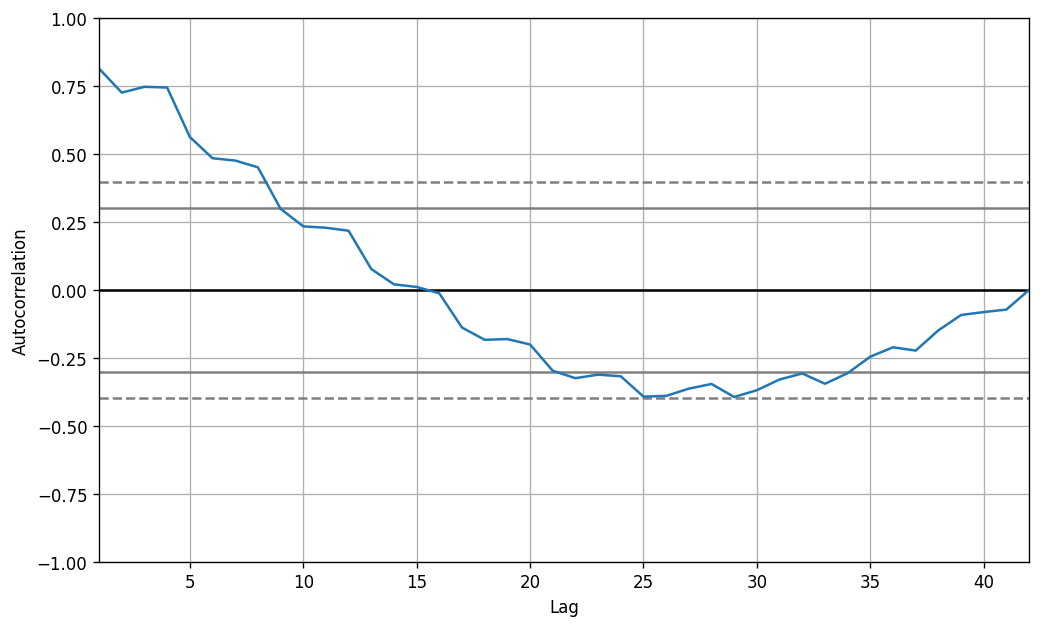

In [11]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Sales'].tolist())

In [12]:
len(df['Sales'])

42

# Autocorrelation and Partial Autocorrelation Functions

* Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

* Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

/Users/KR20258655/opt/miniconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


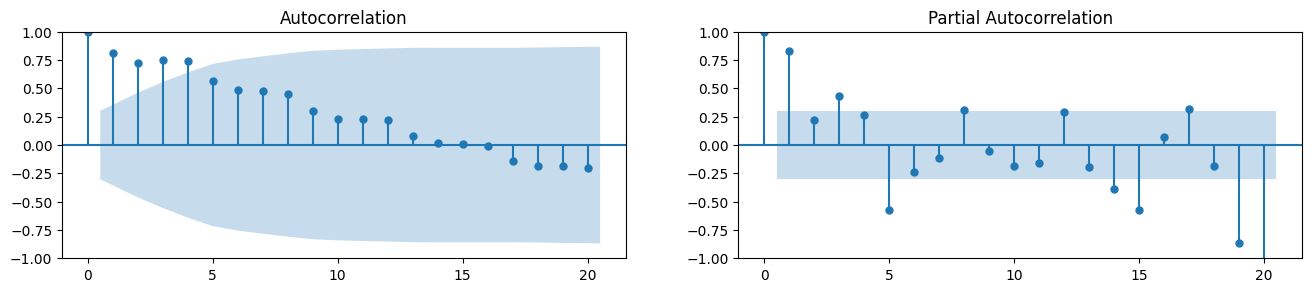

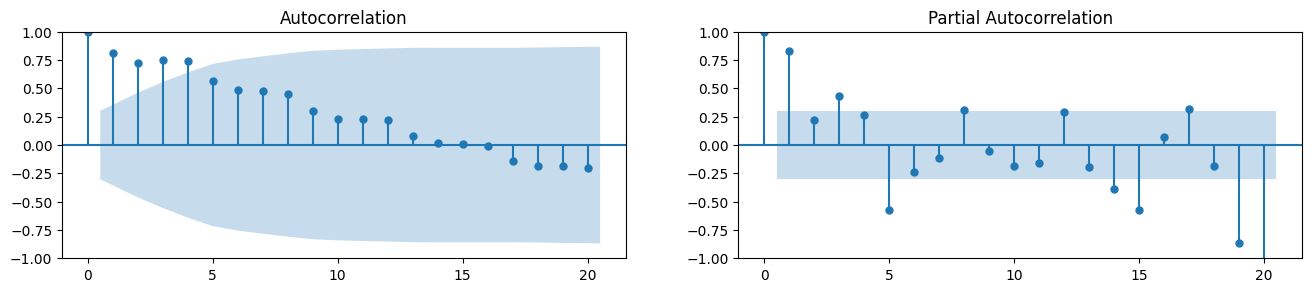

In [13]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2, figsize=(16,3), dpi= 100)

plot_acf(df['Sales'].tolist(), lags=20, ax=axes[0])
plot_pacf(df['Sales'].tolist(), lags=20, ax=axes[1])

In [14]:
# plot_acf(df['Sales'])

# Computation of Partial Autocorrelation Function

* The partial autocorrelation function of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.
* For example, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient  𝛼3  of Y_t-3 in the following equation:

#  Lag Plots

* A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

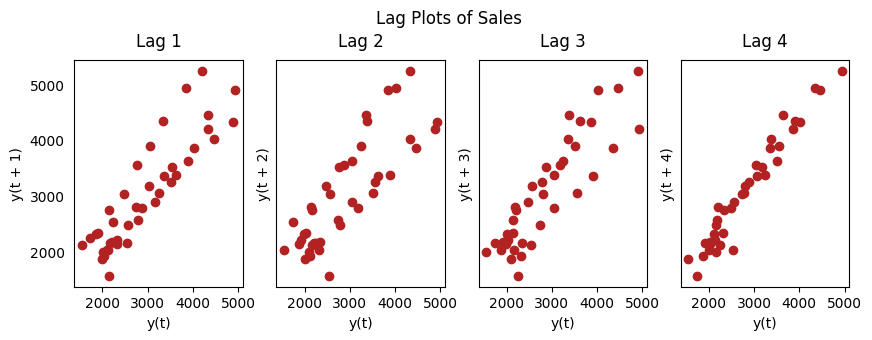

In [15]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Sales'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sales', y=1.05)    
plt.show()

# Granger Causality Test

* Granger causality test is used to determine if one time series will be useful to forecast another. It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.

* So, Granger causality test should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only. It is implemented in the statsmodel package.

### we don't have exact time value present, if it is present then we can use below code to calculate
```
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.DataFrame()
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
data['weeks'] = data.date.dt.week
grangercausalitytests(data[['Sales', 'month']], maxlag=3)
grangercausalitytests(data[['Sales', 'weeks']], maxlag=3)
```

In [16]:
df.shape

(42, 2)

In [17]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['Sales'], order=(1,1,1))

model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -304.931
Date:                Fri, 08 Dec 2023   AIC                            615.862
Time:                        15:54:22   BIC                            621.002
Sample:                             0   HQIC                           617.734
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1888      0.469      0.403      0.687      -0.731       1.108
ma.L1         -0.5873      0.438     -1.340      0.180      -1.447       0.272
sigma2      1.656e+05   4.47e+04      3.704      0.000     7.8e+04    2.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.74
Prob(Q):                              0.75   Prob(JB):                         0.25
Heteroskedasticity (H):               2.93   Skew:                             0.60
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
print(len(df))

42


<AxesSubplot:>

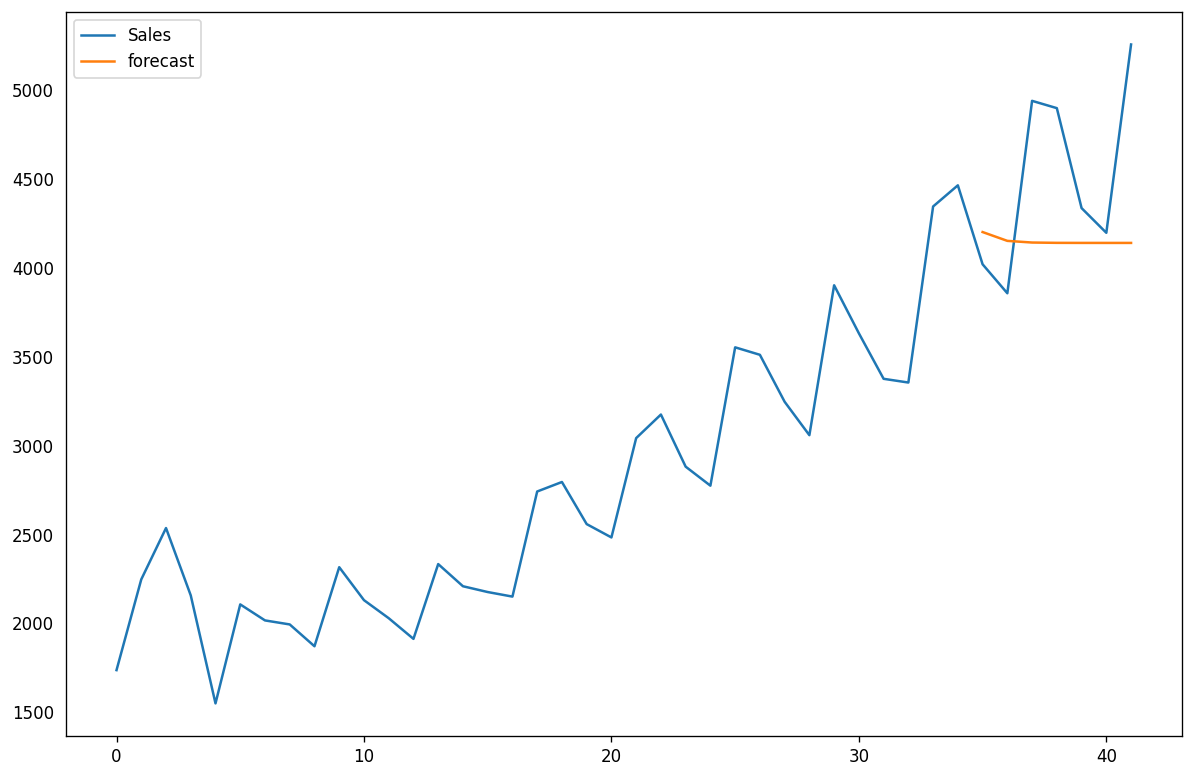

In [19]:
df['forecast']=model_fit.predict(start=35,end=42,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

* While using above parameter we try to train model for 1-35 and test for some samples 36 to 42 order=(1,1,1) non-seasonal parameter
* Model missing trend and pattern that why not performing good

# Now try with seasonal parameter 

                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -240.528
Date:                           Fri, 08 Dec 2023   AIC                            491.056
Time:                                   15:55:08   BIC                            499.110
Sample:                                        0   HQIC                           493.895
                                            - 42                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5589      0.376      1.487      0.137      -0.178       1.296
ma.L1         -0.8141      0.266     -3.065

<AxesSubplot:>

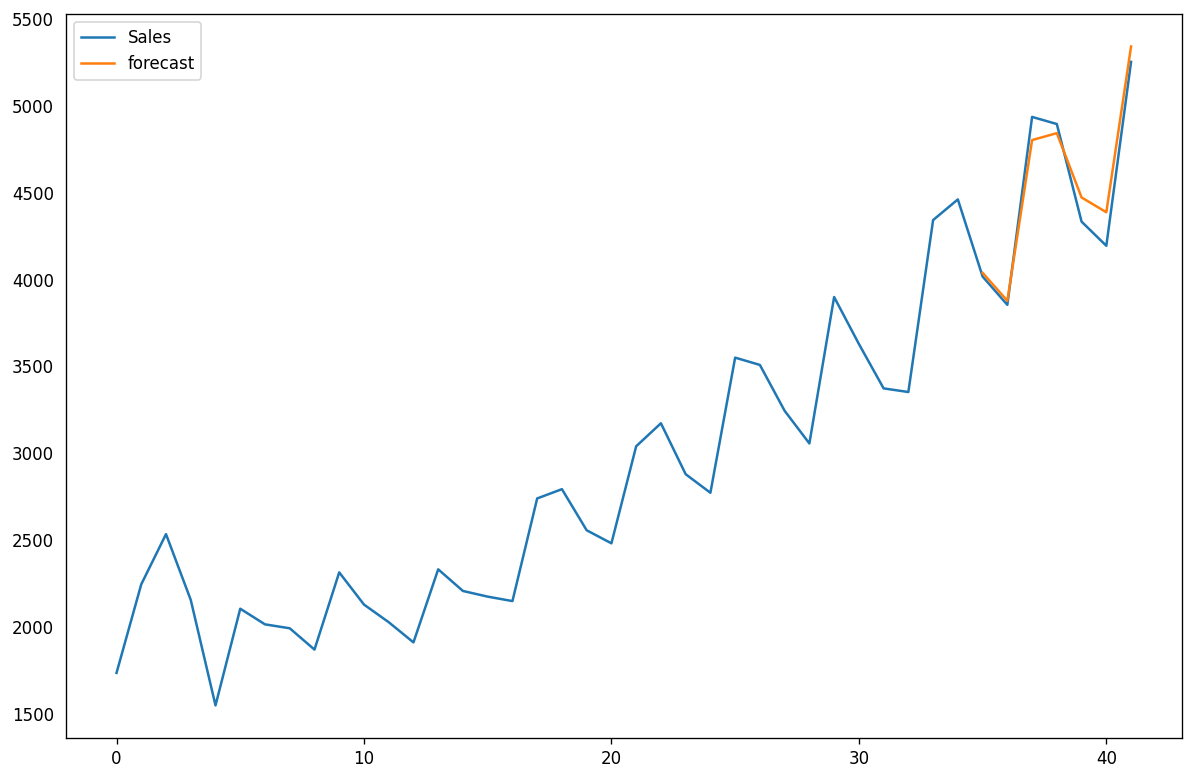

In [25]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1), seasonal_order=(1,1,1,4))
results=model.fit()
print(results.summary())
df['forecast']=results.predict(start=35,end=50,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))


* The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. 
* d must be an integer indicating the integration order of the process, while p and q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. 
* s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.

# Calculate errors

In [30]:
forecast_error_calculation = df[35:]

In [31]:
forecast_error_calculation

,Quarter,Sales,forecast
35,Q4_94,4017.0,4038.443580
36,Q1_95,3854.0,3877.326538
37,Q2_95,4936.0,4802.664727
38,Q3_95,4895.0,4842.455966
39,Q4_95,4333.0,4472.147309
40,Q1_96,4194.0,4387.217220
41,Q2_96,5253.0,5341.499020


In [34]:
# Calculate errors
errors = forecast_error_calculation['Sales'] - forecast_error_calculation['forecast']
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(errors / forecast_error_calculation['Sales'])) * 100
smape = np.mean(2 * np.abs(errors) / (np.abs(forecast_error_calculation['Sales']) + np.abs(forecast_error_calculation['forecast']))) * 100

# Print results
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'sMAPE: {smape:.2f}%')

MAE: 93.07
MSE: 12295.72
RMSE: 110.89
MAPE: 2.06%
sMAPE: 2.04%


<AxesSubplot:>

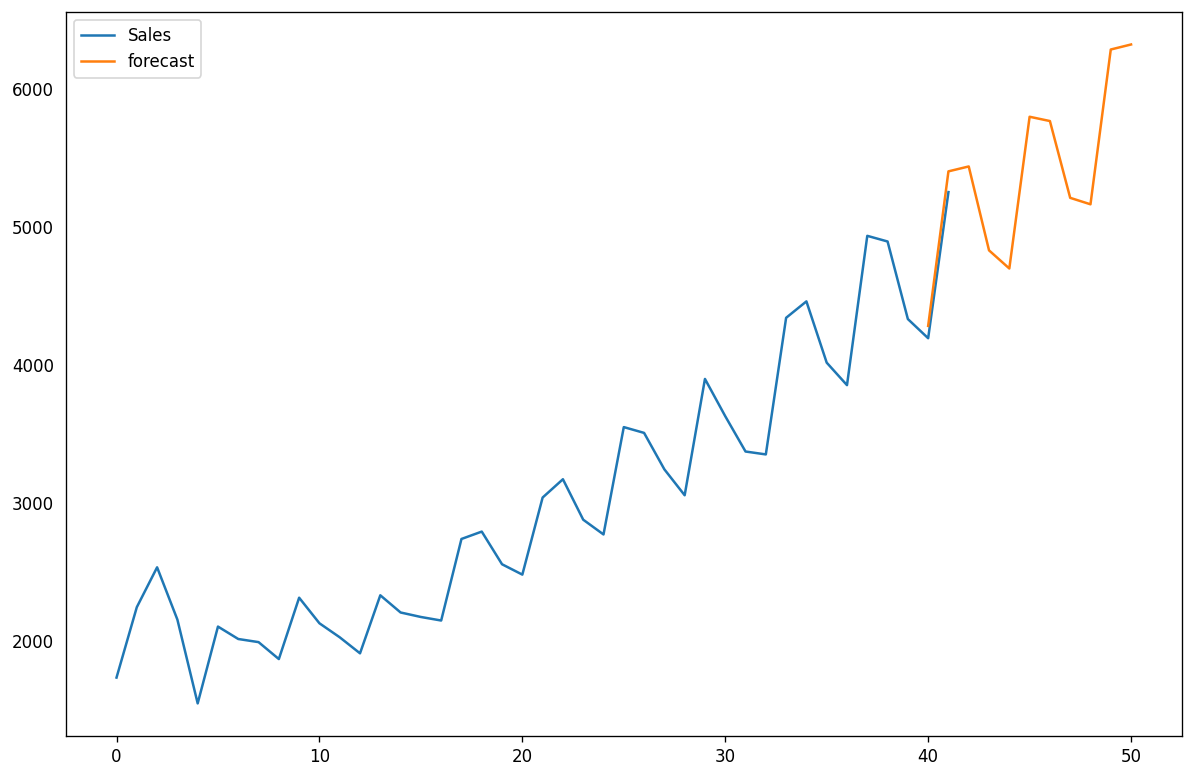

In [35]:

future_datest_df=pd.DataFrame(index=np.arange(41, 51,1),columns=['Sales'])
future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 40, end = 50, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

* Time Series forecasting is really useful when we have to take future decisions or we have to do analysis, 
* we can quickly do that using ARIMA, there are lots of other Models like AUTOARIMA [SARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html), neuralprophet, Darts from we can do the time series forecasting but ARIMA is really easy to understand.

In [36]:
future_df

,Quarter,Sales,forecast
0,Q1_86,1734.827000,NaN
1,Q2_86,2244.960999,NaN
2,Q3_86,2533.804993,NaN
3,Q4_86,2154.962997,NaN
4,Q1_87,1547.818996,NaN
5,Q2_87,2104.411995,NaN
6,Q3_87,2014.362999,NaN
7,Q4_87,1991.746998,NaN
8,Q1_88,1869.049999,NaN
9,Q2_88,2313.631996,NaN
